In [1]:
# !pip install seaborn
import pandas as pd
import seaborn as sns

In [35]:
df = pd.read_parquet("../additional_data/T100_data/t100_segment_data.parquet")
challenge_df = pd.read_csv("/home/wues_ni/Projects/ATOW-Prediction/data/challenge_set.csv")

In [36]:
mapping = {
        "A320": 694,
        "A20N": 722,
        "B738": 614,
        "A321": 699,
        "E195": 748,
        "A21N": 721,
        "CRJ9": 638, # Candair only
        "A319": 698,
        "A333": 687,
        "B38M": 838, # Max 800?
        "BCS3": 724,
        "B77W": 637,
        "B772": 627,
        "AT76": 442, # Aerospatiale/Aeritalia ATR-72
        "B788": 887,
        "B789": 889,
        "BCS1": 720,
        "B737": 612,
        "A332": 696, # A330-200 + A330-223/234
        "E190": 678,
        "B739": 634, # ER version is 888
        "A359": 359,
        "B763": 626,
        "B39M": 839, # Max 900?
        "A343": 871,
        "B752": 622,
        "E290": 678, # E190-E2 version is not available => E190 with lower fuel consumption
        "B773": 637,
        "A310": 692, # [692, 693],
        "C56X": 646
    }

In [37]:
df.columns

Index(['DEPARTURES_SCHEDULED', 'DEPARTURES_PERFORMED', 'PAYLOAD', 'SEATS',
       'PASSENGERS', 'FREIGHT', 'MAIL', 'DISTANCE', 'RAMP_TO_RAMP', 'AIR_TIME',
       'UNIQUE_CARRIER', 'AIRLINE_ID', 'UNIQUE_CARRIER_NAME',
       'UNIQUE_CARRIER_ENTITY', 'REGION', 'CARRIER', 'CARRIER_NAME',
       'CARRIER_GROUP', 'CARRIER_GROUP_NEW', 'ORIGIN_AIRPORT_ID',
       'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'DEST_WAC', 'AIRCRAFT_GROUP', 'AIRCRAFT_TYPE', 'AIRCRAFT_CONFIG',
       'YEAR', 'QUARTER', 'MONTH', 'DISTANCE_GROUP', 'CLASS', 'DATA_SOURCE'],
      dtype='object')

In [38]:
df = df[df["DEPARTURES_PERFORMED"] > 0]
df = df[df["DEPARTURES_SCHEDULED"] > 0]
# df = df[df["AIRCRAFT_TYPE"] != 999]
df = df[df["AIRCRAFT_TYPE"].isin(mapping.values())]

df["SEATS_PER_DEPARTURE"] = df["SEATS"] / df["DEPARTURES_PERFORMED"]
df["PASSENGERS_PER_DEPARTURE"] = df["PASSENGERS"] / df["DEPARTURES_PERFORMED"]

df["RAMP_TO_RAMP_PER_DEPARTURE"] = df["RAMP_TO_RAMP"] / df["DEPARTURES_PERFORMED"]
df["GROUND_TIME_PER_DEPARTURE"] = ((df["RAMP_TO_RAMP"] - df["AIR_TIME"]) / df["DEPARTURES_PERFORMED"]) / 60
df["AIR_TIME_PER_DEPARTURE"] = (df["AIR_TIME"] / df["DEPARTURES_PERFORMED"]) / 60
df["DISTANCE_PER_DEPARTURE"] = (df["DISTANCE"] / df["DEPARTURES_PERFORMED"])
df["PAYLOAD_PER_DEPARTURE"] = (df["PAYLOAD"] / df["DEPARTURES_PERFORMED"])
df["LOAD_FACTOR"] = df["PASSENGERS"] / df["SEATS"]

df = df[(df["AIR_TIME_PER_DEPARTURE"] < 18 * 60) & (df["AIR_TIME_PER_DEPARTURE"] > 0)]
df = df[(df["LOAD_FACTOR"] > 0) & (df["LOAD_FACTOR"] < 1.5)]
df = df[(df["PAYLOAD_PER_DEPARTURE"] > 0)]
df = df[(df["PASSENGERS_PER_DEPARTURE"] > 0)]


In [39]:
df["PAYLOAD_PER_DEPARTURE"].describe()

count    3.086542e+06
mean     4.235729e+04
std      1.787769e+04
min      9.020134e+02
25%      3.460000e+04
50%      3.811000e+04
75%      4.411900e+04
max      5.450000e+05
Name: PAYLOAD_PER_DEPARTURE, dtype: float64

In [40]:
a320 = df[df["AIRCRAFT_TYPE"] == 694]

<Axes: >

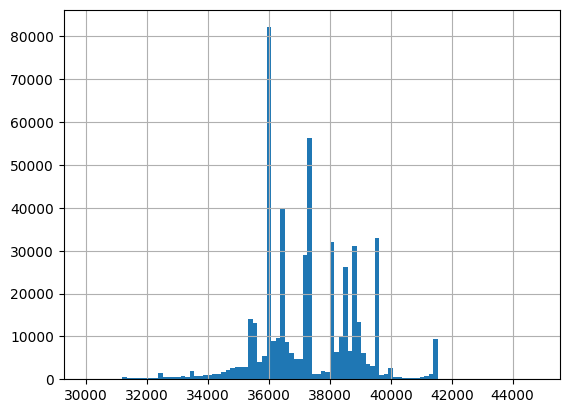

In [41]:
a320[(a320["PAYLOAD_PER_DEPARTURE"] > 30000) & (a320["PAYLOAD_PER_DEPARTURE"] < 45000)]["PAYLOAD_PER_DEPARTURE"].hist(bins=100)

<Axes: >

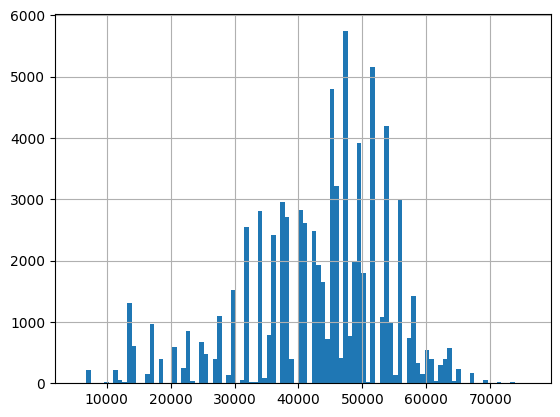

In [54]:
c_a320 = challenge_df[challenge_df["aircraft_type"] == "A320"]
((1/0.453592) * (c_a320["tow"] - 42400)).hist(bins=100)

In [55]:
a320["UNIQUE_CARRIER_NAME"].unique()

array(['United Air Lines Inc.', 'JetBlue Airways', 'US Airways Inc.',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.', 'Virgin America',
       'USA 3000 Airlines', 'Northwest Airlines Inc.',
       'America West Airlines Inc.', 'Midway Airlines Inc.',
       'USAir Shuttle', 'American Airlines Inc.', 'Alaska Airlines Inc.',
       'Spirit Air Lines', 'Allegiant Air', 'Ryan International Airlines',
       'Breeze Aviation Group DBA  Breeze', 'PSA Airlines Inc.',
       'Worldwide Airlines Services', 'Pan American World Airways'],
      dtype=object)

In [68]:
c_a320["route"] = c_a320["ades"] + "_" + c_a320["adep"]
c_a320["route"].value_counts()

/tmp/ipykernel_2780069/3214098055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_a320["route"] = c_a320["ades"] + "_" + c_a320["adep"]


route
EIDW_EGLL    1272
EGLL_EIDW    1238
EIDW_EGKK    1030
EGKK_EIDW    1015
LOWW_EDDF     973
             ... 
EBBR_EGNX       1
EBLG_EBBR       1
EETN_LTFM       1
EBBR_EBLG       1
EBBR_HEGN       1
Name: count, Length: 1077, dtype: int64

In [72]:
c_a320["airline"].value_counts()

airline
a73f82288988b79be490c6322f4c32ed    28284
5d407cb11cc29578cc3e292e743f5393    22227
bdeeef3a675587d530de70a25d7118d2    13780
2d5def0a5a844b343ba1b7cc9cb28fa9     6914
8be5c854fd664bcb97fb543339f74770     5844
6351ec1b849adacc0cbb3b1313d8d39b     1674
f502877cab405652cf0dd70c2213e730      526
1332254e11e92b4ac6410613b2e86787      395
3a6435cd8884f0dd51b886b3e57267f3       94
36b364c9ba9ffb2e3e4803cb4e025745       13
713b84080a5509415d149fe1f7f0add1        9
ecae30f8b0a678b4e97d1f7307642d2b        1
Name: count, dtype: int64

<Axes: >

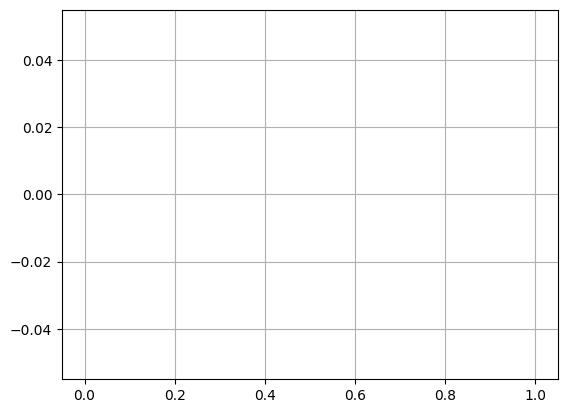

In [79]:
c_a320[(c_a320["airline"] == "2d5def0a5a844b343ba1b7cc9cb28fa9") & (c_a320["route"] == "EIDW_EGLL")]["tow"].hist(bins=100)

In [34]:
cols = ["AIR_TIME_PER_DEPARTURE", "GROUND_TIME_PER_DEPARTURE", "DISTANCE_PER_DEPARTURE", "MONTH", "PAYLOAD_PER_DEPARTURE"]
a320 = a320[(a320["PAYLOAD_PER_DEPARTURE"] > 30000) & (a320["PAYLOAD_PER_DEPARTURE"] < 45000)]
a320[cols].to_csv("A320_T100.csv")

In [ ]:
sns.barplot(a320, x="YEAR", y="SEATS_PER_DEPARTURE")

In [ ]:
a320[a320["YEAR"] == 2022]["SEATS_PER_DEPARTURE"].hist(bins=100)

In [ ]:
a320[a320["YEAR"] == 2022]["PAYLOAD_PER_DEPARTURE"].hist(bins=100)

In [ ]:
sns.scatterplot(a320[a320["YEAR"] == 2022], x="PAYLOAD_PER_DEPARTURE", y ="SEATS_PER_DEPARTURE", size=1) 

In [ ]:
def mapping_aircraft(icao_code):
    return mapping[icao_code]

def calculate_typical_values(route, aircraft_type):
    # Filter data for the specific route and aircraft type
    filtered_data = df[(df['ORIGIN'] == route[0]) & 
                         (df['DEST'] == route[1]) & 
                         (df['AIRCRAFT_TYPE'] == mapping_aircraft(aircraft_type))]
    if len(filtered_data) == 0:
        return

    # Function to remove outliers using IQR method
    def remove_outliers(series):
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return series[(series >= lower_bound) & (series <= upper_bound)]
    
    # Calculate typical load factor
    load_factors = remove_outliers(filtered_data['LOAD_FACTOR'])
    typical_load_factor = load_factors.median()
    
    # Calculate typical payload
    payloads = remove_outliers(filtered_data['PAYLOAD_PER_DEPARTURE'])
    typical_payload = payloads.median()
    
    return typical_load_factor, typical_payload

calculate_typical_values(("JFK", "LAX"), "A320")

In [239]:
from pathlib import Path

challenge_data = []
challenge_data.append(pd.read_csv("../data/challenge_set.csv"))
challenge_data.append(pd.read_csv("../data/submission_set.csv"))
if Path("../data/final_submission_set.csv").exists():
    challenge_data.append(pd.read_csv("../data/final_submission_set.csv"))
challenge_data = pd.concat(challenge_data)

In [240]:
challenge_data["taxiout_time"] = pd.to_timedelta(challenge_data["taxiout_time"], unit="m")
challenge_data["arrival_time"] = pd.to_datetime(challenge_data["arrival_time"])
challenge_data["actual_offblock_time"] = pd.to_datetime(challenge_data["actual_offblock_time"])

challenge_data["air_time"] = challenge_data["arrival_time"] - (challenge_data["actual_offblock_time"] + challenge_data["taxiout_time"])

In [ ]:
(challenge_data["air_time"].dt.total_seconds() / 3600).hist(bins=100)

In [ ]:
df = df[df["YEAR"] >= 2022]
(df["AIR_TIME_PER_DEPARTURE"]).hist(bins=100)

In [ ]:
payload_per_hour = (df["PAYLOAD_PER_DEPARTURE"] / df["AIR_TIME_PER_DEPARTURE"])
payload_per_hour[(payload_per_hour) < 100000].hist(bins=100)

In [ ]:
payload_per_passenger = (df["PAYLOAD_PER_DEPARTURE"] / df["PASSENGERS_PER_DEPARTURE"])
payload_per_passenger[payload_per_passenger < 1000].hist(bins=100)

In [245]:
for name ,t100type in mapping.items():
    data = df[df["AIRCRAFT_TYPE"] == t100type]
    payload_per_hour = (data["PAYLOAD_PER_DEPARTURE"] / data["AIR_TIME_PER_DEPARTURE"])
    payload_per_passenger = (data["PAYLOAD_PER_DEPARTURE"] / data["PASSENGERS_PER_DEPARTURE"])
    payload_per_passenger = payload_per_passenger[payload_per_passenger < 1000]
    payload_per_hour = payload_per_hour[(payload_per_hour) < 100000]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df and mapping are already defined

fig, axes = plt.subplots(len(mapping), 2, figsize=(15, 5 * len(mapping)))
fig.suptitle('Payload Distributions by Aircraft Type', fontsize=16)

for i, (name, t100type) in enumerate(mapping.items()):
    data = df[df["AIRCRAFT_TYPE"] == t100type]
    
    payload_per_hour = (data["PAYLOAD_PER_DEPARTURE"] / data["AIR_TIME_PER_DEPARTURE"])
    payload_per_hour = payload_per_hour[payload_per_hour < 100000]
    
    payload_per_passenger = (data["PAYLOAD_PER_DEPARTURE"] / data["PASSENGERS_PER_DEPARTURE"])
    payload_per_passenger = payload_per_passenger[payload_per_passenger < 1000]
    
    # Payload per hour histogram
    sns.histplot(payload_per_hour, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{name}: Payload per Hour')
    axes[i, 0].set_xlabel('Payload per Hour')
    axes[i, 0].set_ylabel('Frequency')
    
    # Payload per passenger histogram
    sns.histplot(payload_per_passenger, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'{name}: Payload per Passenger')
    axes[i, 1].set_xlabel('Payload per Passenger')
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df and mapping are already defined

fig, axes = plt.subplots(len(mapping), 2, figsize=(15, 5 * len(mapping)))

for i, (name, t100type) in enumerate(mapping.items()):
    data = df[df["AIRCRAFT_TYPE"] == t100type]
    
    payload_per_hour = (data["PAYLOAD_PER_DEPARTURE"] / data["AIR_TIME_PER_DEPARTURE"])
    payload_per_hour = payload_per_hour[payload_per_hour < 100000]
    
    payload_per_passenger = (data["PAYLOAD_PER_DEPARTURE"] / data["PASSENGERS_PER_DEPARTURE"])
    payload_per_passenger = payload_per_passenger[payload_per_passenger < 1000]
    
    # Payload per hour histogram with median line
    sns.histplot(payload_per_hour, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{name}: Payload per Hour')
    axes[i, 0].set_xlabel('Payload per Hour')
    axes[i, 0].set_ylabel('Frequency')
    
    # Calculate and plot median for payload per hour
    median_payload_per_hour = payload_per_hour.median()
    axes[i, 0].axvline(x=median_payload_per_hour, color='red', linestyle='--', label=f'Median: {median_payload_per_hour:.2f}')
    axes[i, 0].legend()
    
    # Payload per passenger histogram with median line
    sns.histplot(payload_per_passenger, ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'{name}: Payload per Passenger')
    axes[i, 1].set_xlabel('Payload per Passenger')
    axes[i, 1].set_ylabel('Frequency')
    
    # Calculate and plot median for payload per passenger
    median_payload_per_passenger = payload_per_passenger.median()
    axes[i, 1].axvline(x=median_payload_per_passenger, color='red', linestyle='--', label=f'Median: {median_payload_per_passenger:.2f}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df and mapping are already defined
fig, axes = plt.subplots(len(mapping), 1, figsize=(15, 15 * len(mapping)))
fig.suptitle('Correlation Matrices by Aircraft Type (Numeric Columns Only)', fontsize=16)

for i, (name, t100type) in enumerate(mapping.items()):
    data = df[df["AIRCRAFT_TYPE"] == t100type]
    
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix for numeric columns
    corr_matrix = numeric_data.corr()
    
    # Plot correlation matrix
    ax = axes[i] if len(mapping) > 1 else axes  # Handle the case when there's only one subplot
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(f'{name}: Correlation Matrix')
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Adjust layout to prevent overlapping
    plt.tight_layout()

plt.show()

# Print correlation values and data types
for name, t100type in mapping.items():
    data = df[df["AIRCRAFT_TYPE"] == t100type]
    numeric_data = data.select_dtypes(include=[np.number])
    corr_matrix = numeric_data.corr()
    
    print(f"\nCorrelation Matrix for {name}:")
    print(corr_matrix.to_string())
    
    print(f"\nData types for {name}:")
    print(data.dtypes.to_string())
    
    print("\nNon-numeric columns:")
    print(data.select_dtypes(exclude=[np.number]).columns.tolist())

In [ ]:
a320 = data